# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


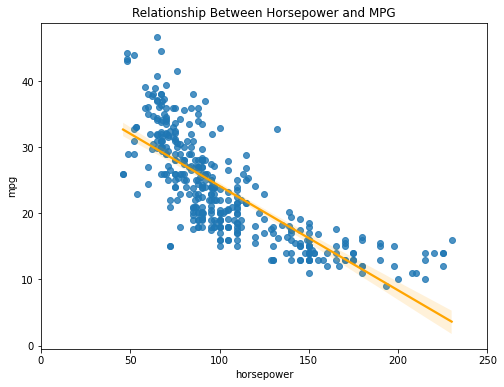

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- residual sum of squares on y, slope on x
- this IS the loss function (cost function) itself
- We use this cost function to perform gradient descent and find our minimum error and therefore our optimum slope (or Beta)


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

- we would step down to the right, and re-evaluate: keep going downhill?
- what is it using on this curve to inform which way it goes?  The gradient
(or the REVERSE of the gradient to go downhill)
- it uses the partial derivative of each feature to find our gradient

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- step-size: how far we move down our cost function
- determined by our learning rate and how far away we are from the minimum (on our gradient)
- the learning rate is the proportion (fraction) of our gradient that we 
factor into our next step


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- classification, doesn't have to be binary.  Stronger with binary, 
 but can be multiclass
- predictions: probability, or our log odds that we translate into prob
- target for linear regression is continous vs. logistic regression is categorical/discrete
- parametric - because it is optimizing for our coefs


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

Pros
- quick to train (fit)
- not prone to overfitting (built in regularization, i.e. penalty='L2')
- more interpretable (transparent)

Cons
- not going to handle class imbalance well
- compared to a decision tree, say, what kind of data would the DT handle better?  outliers.  The logistic regression is NOT robust for OUTLIERS (error terms are being squared)

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']
# Train-test split
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

#### Answer:

- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Good dummy model:  predicting ALL targets to be 0 (Always return our 0 class)
- DummyClassifier(strategy = 'most_frequent') 


In [18]:
from sklearn.dummy import DummyClassifier

In [19]:
dc = DummyClassifier(strategy = 'most_frequent')

In [20]:
dc.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

In [21]:
dc.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

#### Part 3: How accurate would that baseline be on test data?


In [22]:
# Code to find the answer
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- would be about 75% accurate


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [23]:
# call_on_students(1)

#### Answer:

- target has class imbalance
- we could SMOTE.  Can oversample or undersample.  Typically we oversample (the minority), but we COULD undersample (the majority).  Rarely do that.  Would need LARGE data set
- we could ALSO adjust hyperparameter on instantiation of model- class_weight
- could also do predict_probas_ and adjust decision threshold for ROC, AUC


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [24]:
# call_on_students(1)

In [25]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

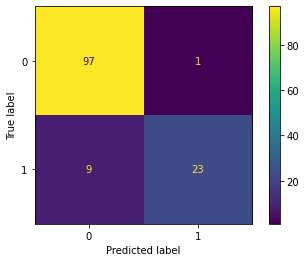

In [26]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [27]:
# call_on_students(1)

In [28]:
y_pred_test = logreg.predict(X_test_scaled)

In [29]:
# Accuracy  (TP+TN / total predictions)
accuracy_score(y_test, y_pred_test)

0.9230769230769231

In [30]:
# Precision (TP / TP+FP) - denominator is total of predicted positives
precision_score(y_test, y_pred_test)

0.9583333333333334

In [31]:
# Recall (TP / TP+FN) - denominator is total of actual total positives
recall_score(y_test, y_pred_test)

0.71875

In [32]:
# F1-Score (2 * (Precision * Recall) / (Precision + Recall) )
f1_score(y_test, y_pred_test)

0.8214285714285714

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [35]:
# call_on_students(1)

In [36]:
test_probs = logreg.predict_proba(X_test_scaled)
pos_probs = test_probs[:, 1]  # this is like a double index.  : returns itself, 
# then we take the WHOLE positive column

In [37]:
# Calculate roc-auc
roc_auc_score(y_test, pos_probs)

0.9811862244897959

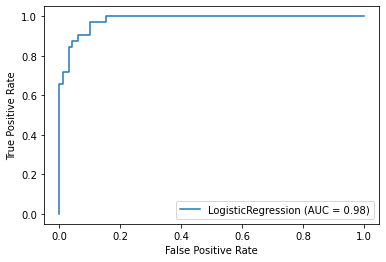

In [38]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [39]:
# call_on_students(1)

#### Answer:

- really fuckin good (at identifying our positive class)
- AUC close to 1
- accuracy and precision are really high, recall is somewhat lower
- What does that mean?  Our model is more prone to making false negative predictions


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [40]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

# 2 DTs, same but with different fit

DecisionTreeClassifier(max_depth=1, random_state=42)

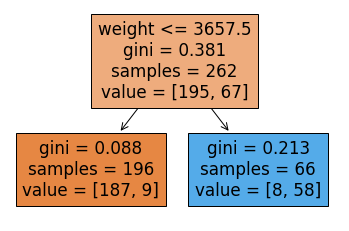

In [41]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

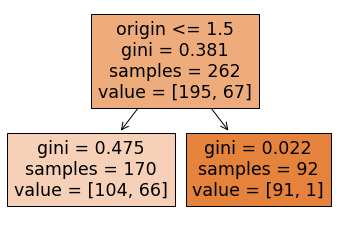

In [42]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [43]:
# call_on_students(1)

#### Answer:

- The split on weight is doing the better job
- Why?  could add up gini scores on left, and that would be lower (less impurity, 'more pure').  So adding up 2 child nodes
- Could also argue it based on the breakdown of the values but that's HOW gini score is calculated


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [44]:
# call_on_students(1)

In [45]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

# don't have to do scaled because it's NOT distance-based
# it's the same answer whether you use X_train or X_train_scaled

DecisionTreeClassifier(random_state=42)

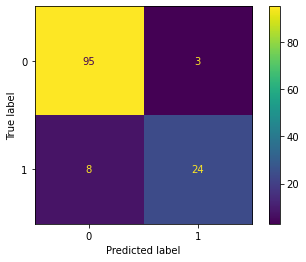

In [46]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test);

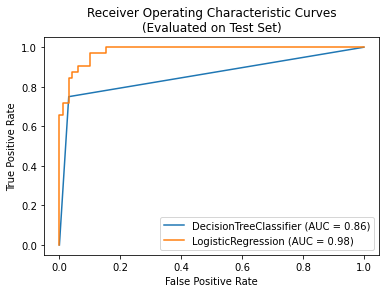

In [47]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [48]:
# call_on_students(1)

#### Answer:

- Our logistic regression
- DT is overfitting.  Looked at training data and DT had AUC = 1.
- Didn't do any hyperparameters for DT model
